In [110]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [111]:
soildata=pd.read_csv('/content/ESML_Dataset.csv')

In [128]:

soildata.rename(columns={'moisture': 'Moisture'}, inplace=True)  # Renaming 'moisture' to 'Moisture'
soildata.rename(columns={'temp': 'Temperature'}, inplace=True)    # Renaming 'temp' to 'Temperature'
soildata.rename(columns={'pump': 'Pump'}, inplace=True)           # Renaming 'pump' to 'Pump'

# Printing the size of the DataFrame
print('Size (rows, columns) of the data frame:', soildata.shape)

# Displaying the first 10 rows of the DataFrame
soildata.head(10)


Size (rows, columns) of the data frame: (1054, 4)


,crop,Moisture,Temperature,Pump
0,wheat,638,16,0
1,wheat,522,18,0
2,wheat,741,22,0
3,wheat,798,32,0
4,wheat,690,28,0
5,wheat,558,23,0
6,wheat,578,12,0
7,wheat,673,35,0
8,wheat,642,45,0
9,wheat,723,11,0


In [129]:
soildata.describe()

,Moisture,Temperature,Pump
count,1054.000000,1054.000000,1054.000000
mean,612.975332,25.213472,0.274194
std,208.366052,9.528832,0.446319
min,4.000000,10.000000,0.000000
25%,545.250000,17.000000,0.000000
50%,679.000000,24.000000,0.000000
75%,735.000000,32.000000,1.000000
max,1022.000000,45.000000,1.000000


In [130]:
soildata['Pump'].value_counts()

0    765
1    289
Name: Pump, dtype: int64

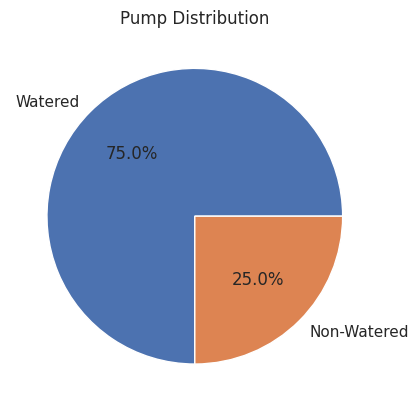

In [131]:
# Importing the matplotlib.pyplot module for plotting
import matplotlib.pyplot as plt
import numpy as np  # Importing numpy for numerical operations

# Defining the labels for the pie chart
labels = ["Watered", "Non-Watered"]

# Creating an array for the data to be represented in the pie chart
y = np.array([150, 50])

# Creating a pie chart
plt.pie(y, labels=labels, autopct='%1.1f%%')  # 'autopct' is used to format the value shown on each slice of the pie

# Adding a title to the pie chart
plt.title('Pump Distribution')

# Displaying the pie chart
plt.show()


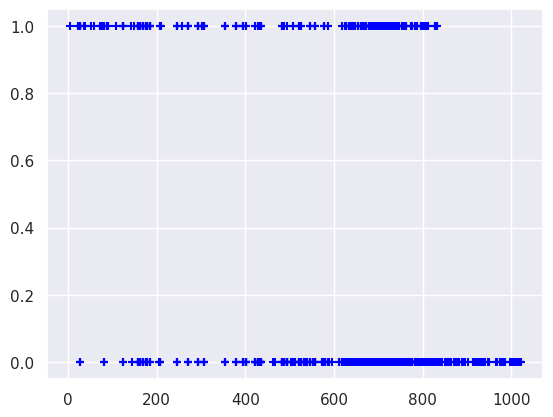

In [116]:
plt.scatter(soildata.Moisture,soildata.Pump,marker='+',color='blue')

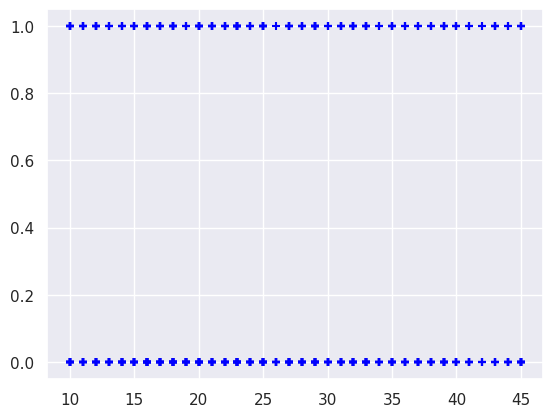

In [117]:
plt.scatter(soildata.Temperature,soildata.Pump,marker='+',color='blue')

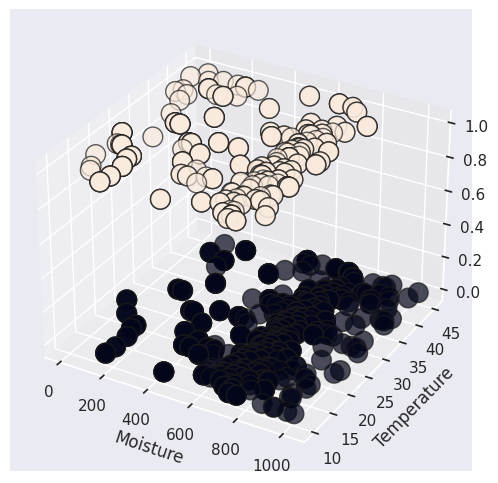

In [132]:
# Importing required modules for 3D plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating a figure for the plot with a specified size
fig = plt.figure(figsize=(6, 6))

# Adding a 3D subplot to the figure
ax = fig.add_subplot(111, projection='3d')

# Creating a 3D scatter plot
# The axes are soildata.Moisture, soildata.Temperature, and soildata.Pump
ax.scatter(soildata.Moisture, soildata.Temperature, soildata.Pump,
           linewidths=1,  # Setting the linewidths of the points
           alpha=0.7,     # Adjusting the transparency of the points
           edgecolor='k', # Setting the edge color of the points to black
           s=200,         # Setting the size of the points
           c=soildata.Pump) # The color of points is determined by the 'Pump' column values

# Setting labels for the X and Y axes
plt.xlabel("Moisture")
plt.ylabel("Temperature")

# Displaying the plot
plt.show()


<ipython-input-133-d597256847d9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = soildata.corr()


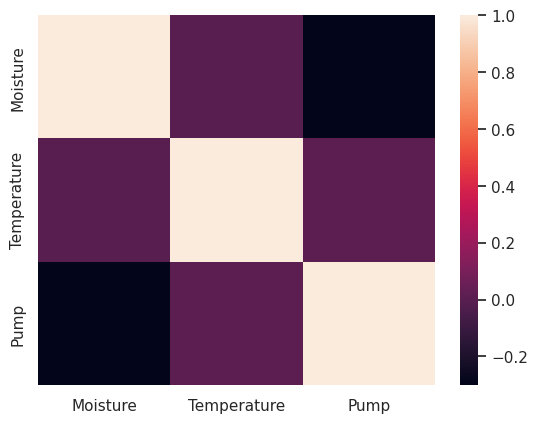

In [133]:
import seaborn as sns  # Importing seaborn for advanced visualization

# Calculating the correlation matrix for the soildata DataFrame
cormat = soildata.corr()

# Rounding the correlation matrix to 2 decimal places for better readability
rounded_cormat = round(cormat, 2)

# Creating a heatmap to visualize the correlation matrix
sns.heatmap(rounded_cormat)
# 'sns.heatmap' is used to create a color-coded matrix to represent the correlations

# Displaying the heatmap
plt.show()


In [120]:
from sklearn.model_selection import train_test_split

In [134]:
# Preparing data for machine learning model

# Selecting features by dropping the 'Pump' and 'crop' columns from soildata
X = soildata.drop(['Pump', 'crop'], axis=1)
# 'axis=1' indicates that columns are being dropped
# 'X' will contain all features (independent variables) except 'Pump' and 'crop'

# Assigning the target variable
y = soildata['Pump']  # 'y' is set to the 'Pump' column, which is our target variable


In [135]:
from sklearn.model_selection import train_test_split  # Importing the train_test_split function

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [123]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X_train, y_train, X_test, y_test are already defined

# Create an instance of the AdaBoost classifier
# The default base estimator is a decision tree with a max depth of 1 (a stump)
model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Fit the model with training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.94      0.85       153
           1       0.67      0.31      0.42        58

    accuracy                           0.77       211
   macro avg       0.72      0.63      0.64       211
weighted avg       0.75      0.77      0.74       211

[[144   9]
 [ 40  18]]


In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Importing necessary functions from sklearn.metrics


accuracy = accuracy_score(y_test, y_pred)
print(f"{accuracy:.2f}: is the accuracy score")

precision = precision_score(y_test, y_pred)
print(f"{precision:.2f}: is the precision score")

recall = recall_score(y_test, y_pred)
print(f"{recall:.2f}: is the recall score")

f1 = f1_score(y_test, y_pred)
print(f"{f1:.2f}: is the f1 score")


0.77: is the accuracy score
0.67: is the precision score
0.31: is the recall score
0.42: is the f1 score


[[ 18  40]
 [  9 144]]
Confusion matrix, without normalization
[[ 18  40]
 [  9 144]]


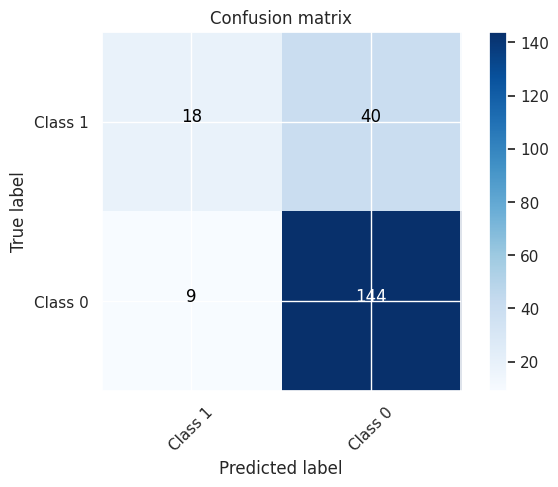

In [137]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Function to print and plot the confusion matrix. Normalization can be applied by setting `normalize=True`.
    Args:
    cm (array-like): Confusion Matrix
    classes (list): Names of the classes to be displayed on the axes
    normalize (bool, optional): If set to True, the confusion matrix is normalized. Defaults to False.
    title (str, optional): Title of the graph. Defaults to 'Confusion matrix'.
    cmap (matplotlib Colormap, optional): Colormap of the matrix. Defaults to plt.cm.Blues.

    Returns:
    None: This function doesn't return anything but plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Setting the text format in the matrix
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Setting the layout of the plot
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print(cm)

# Plotting the confusion matrix
plot_confusion_matrix(cm, classes=['Class 1', 'Class 0'], normalize=False)


Confusion matrix, without normalization
[[ 18  40]
 [  9 144]]


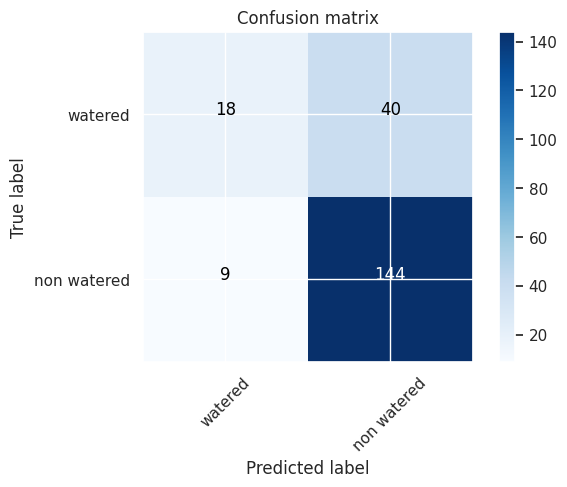

In [138]:
from sklearn.metrics import confusion_matrix


# Defining the function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Creating the confusion matrix with the actual and predicted values
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])

# Setting the print options for numpy arrays to display values with 2 decimal places
np.set_printoptions(precision=2)

# Plotting the non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['watered','non watered'], normalize=False, title='Confusion matrix')


In [139]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       153
           1       0.67      0.31      0.42        58

    accuracy                           0.77       211
   macro avg       0.72      0.63      0.64       211
weighted avg       0.75      0.77      0.74       211

